In [2]:
# Importing necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder ,StandardScaler
from sklearn_extra.cluster import KMedoids
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report ,pairwise_distances_argmin_min
from deap import base, creator, tools, algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import dendrogram, linkage


**Load Data**

In [3]:
# Loading the dataset
df = pd.read_csv(r"d:\Semester Four\Data Mining\train.csv\train.csv")

**Data Description**

In [4]:
df.head(10) # Displaying the first few rows of the dataset to understand its structure

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [5]:
df.shape # Checking the dimensions of the dataset (rows, columns)

(878049, 9)

In [6]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
df.info()  # Checking dataset information such as column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


**Data Cleaning**

In [11]:
df.isnull().sum()  # Check for missing values

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(2323)

In [13]:
df.drop_duplicates(inplace=True) # Removing duplicate rows from the dataset

In [14]:
# Checking if there are any remaining duplicate rows
df.duplicated().sum()

np.int64(0)

In [15]:
df.head() #re-check for data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [16]:
df.shape #re-check for dimensions

(875726, 9)

In [17]:
# Investigate the unique values in the categorical columns
# Check unique values in 'Category' (target variable)
print("\nUnique Categories:")
print(df['Category'].unique())


Unique Categories:
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [18]:
# Check unique values in 'DayOfWeek'
print("\nUnique Days of the Week:")
print(df['DayOfWeek'].unique())


Unique Days of the Week:
['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


In [19]:
# Check unique values in 'PdDistrict'
print("\nUnique Police Districts:")
print(df['PdDistrict'].unique())


Unique Police Districts:
['NORTHERN' 'PARK' 'INGLESIDE' 'BAYVIEW' 'RICHMOND' 'CENTRAL' 'TARAVAL'
 'TENDERLOIN' 'MISSION' 'SOUTHERN']


In [20]:
# Check if geospatial data (X, Y) is valid or within expected ranges
print("\nGeospatial Data Summary (X, Y coordinates):")
print(df[['X', 'Y']].describe())


Geospatial Data Summary (X, Y coordinates):
                   X              Y
count  875726.000000  875726.000000
mean     -122.422623      37.771032
std         0.030363       0.457497
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416446      37.775421
75%      -122.406959      37.784380
max      -120.500000      90.000000


**Normalization**

In [21]:
# Normalization (Scaling) of numerical features (X and Y)
scaler = MinMaxScaler()
df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])

In [22]:
# Display the dataframe after scaling
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,0.043578,0.001276
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,0.043578,0.001276
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,0.044337,0.001770
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,0.043030,0.001778
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,0.037198,0.001217


In [23]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Category'])  # All features except 'Category'
y = df['Category']  # The target variable is 'Category'

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")
print(f"Training labels (y_train) shape: {y_train.shape}")
print(f"Testing labels (y_test) shape: {y_test.shape}")

Training data (X_train) shape: (700580, 8)
Testing data (X_test) shape: (175146, 8)
Training labels (y_train) shape: (700580,)
Testing labels (y_test) shape: (175146,)


In [24]:
# Convert 'Dates' column to datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Extract the hour
df['Hour'] = df['Dates'].dt.hour

# Check
df[['Dates', 'Hour']].head()

,Dates,Hour
0,2015-05-13 23:53:00,23
1,2015-05-13 23:53:00,23
2,2015-05-13 23:33:00,23
3,2015-05-13 23:30:00,23
4,2015-05-13 23:30:00,23


**Visualization Data**

In [25]:
# Example: Crime Category vs. Day of Week
pd.crosstab(df['Category'], df['DayOfWeek']).style.background_gradient(cmap='Oranges')

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ARSON,220,228,219,211,199,235,200
ASSAULT,11155,10550,11987,12070,10236,10268,10549
BAD CHECKS,62,66,45,20,66,76,71
BRIBERY,49,41,42,41,39,37,40
BURGLARY,6302,5239,4732,4205,5336,5356,5430
DISORDERLY CONDUCT,540,607,624,584,643,657,658
DRIVING UNDER THE INFLUENCE,352,263,457,442,282,251,221
DRUG/NARCOTIC,7415,7812,6385,6138,8447,8463,9259
DRUNKENNESS,621,512,833,813,496,461,541


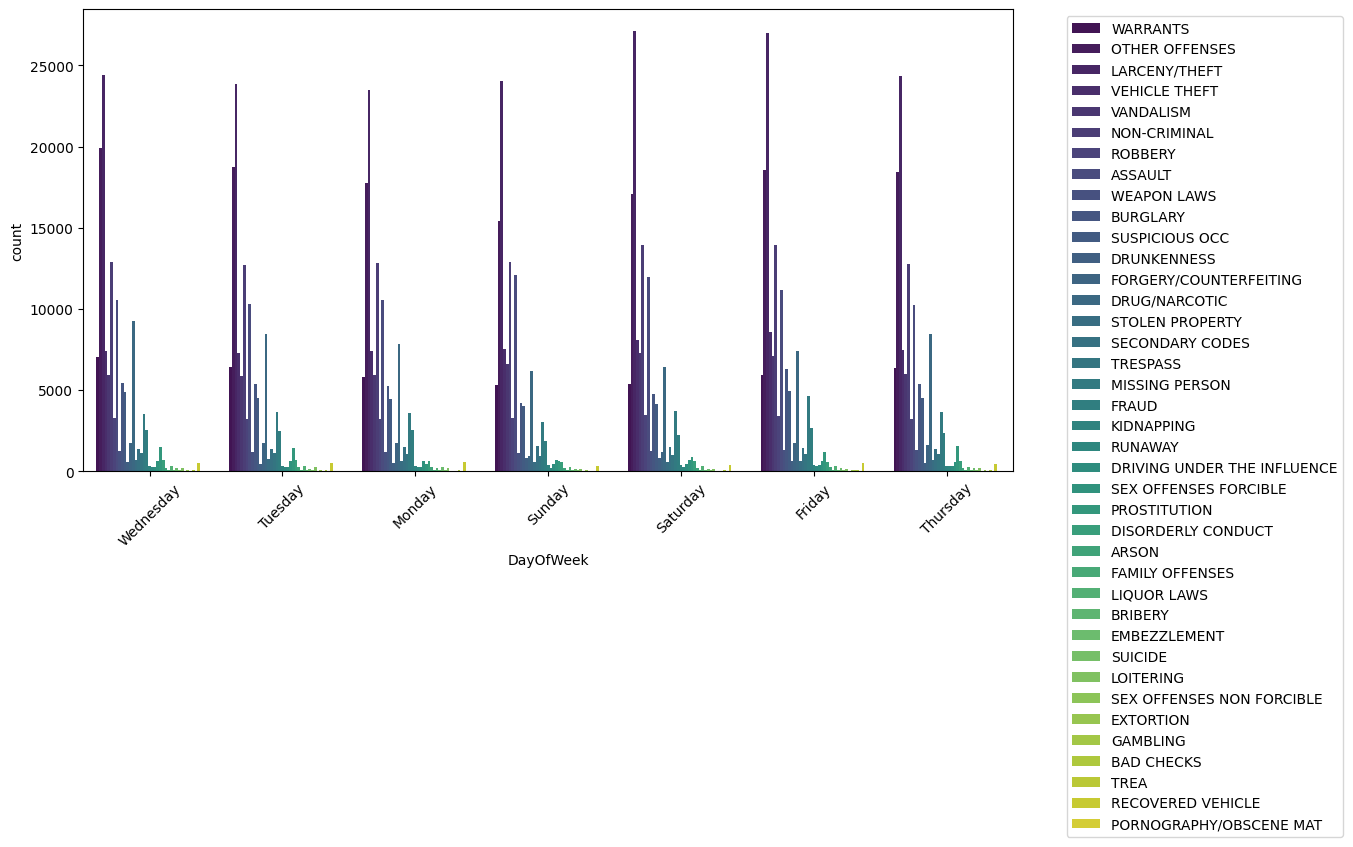

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='Category', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

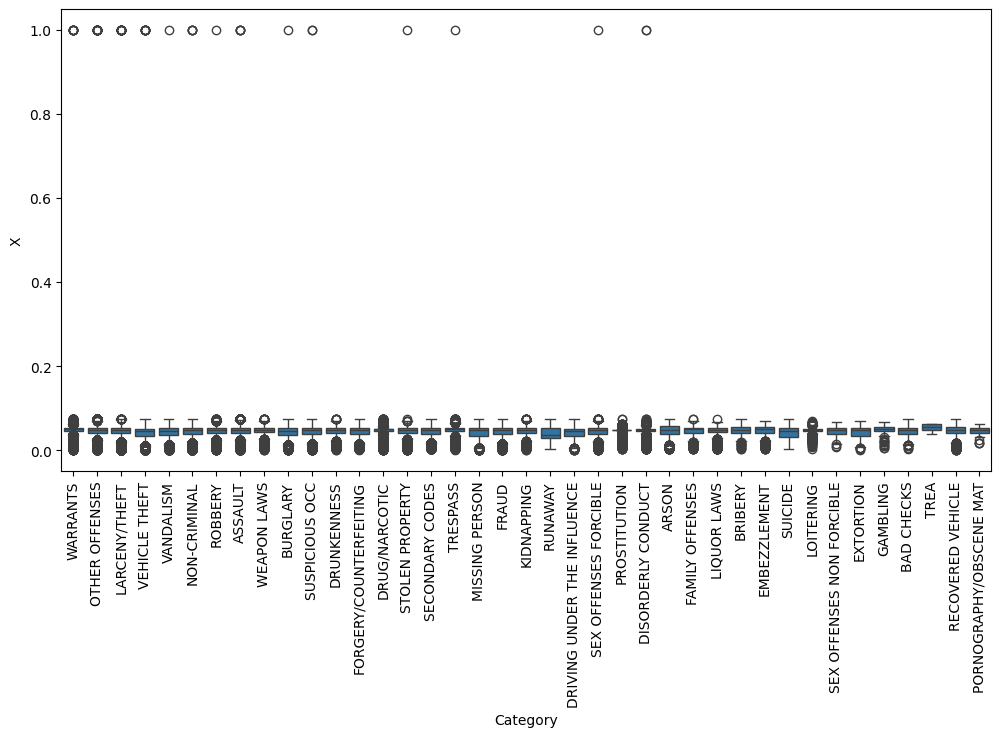

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='X', data=df)  # Longitude distribution per crime type
plt.xticks(rotation=90)
plt.show()

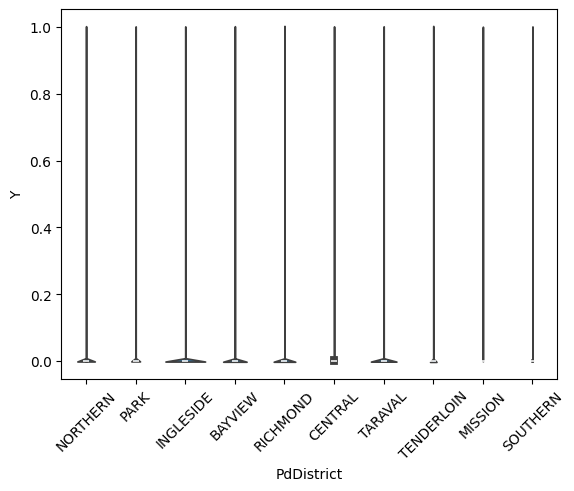

In [29]:
sns.violinplot(x='PdDistrict', y='Y', data=df)  # Latitude distribution per district
plt.xticks(rotation=45)
plt.show()

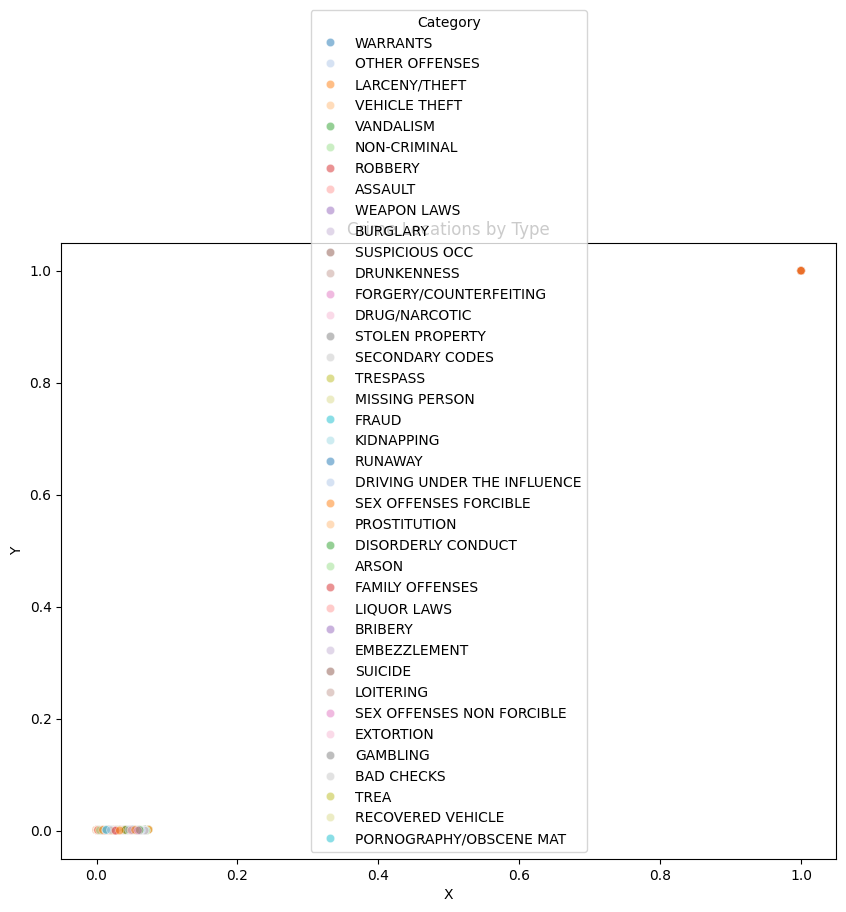

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='Category', data=df, alpha=0.5, palette='tab20')
plt.title('Crime Locations by Type')
plt.show()

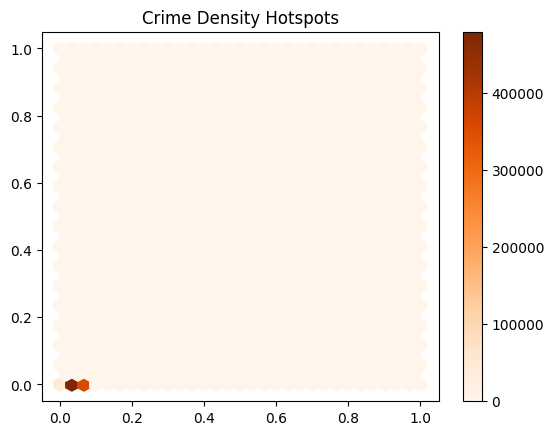

In [33]:
plt.hexbin(df['X'], df['Y'], gridsize=30, cmap='Oranges')
plt.colorbar()
plt.title('Crime Density Hotspots')
plt.show()

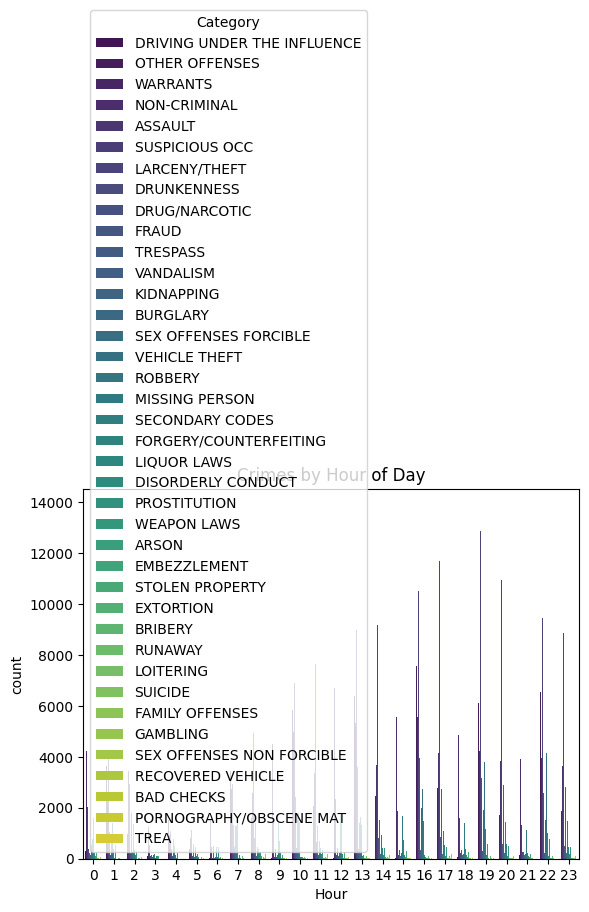

In [34]:
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
sns.countplot(x='Hour', hue='Category', data=df, palette='viridis')
plt.title('Crimes by Hour of Day')
plt.show()

<Axes: title={'center': 'Daily Crime Trends'}, xlabel='Date'>

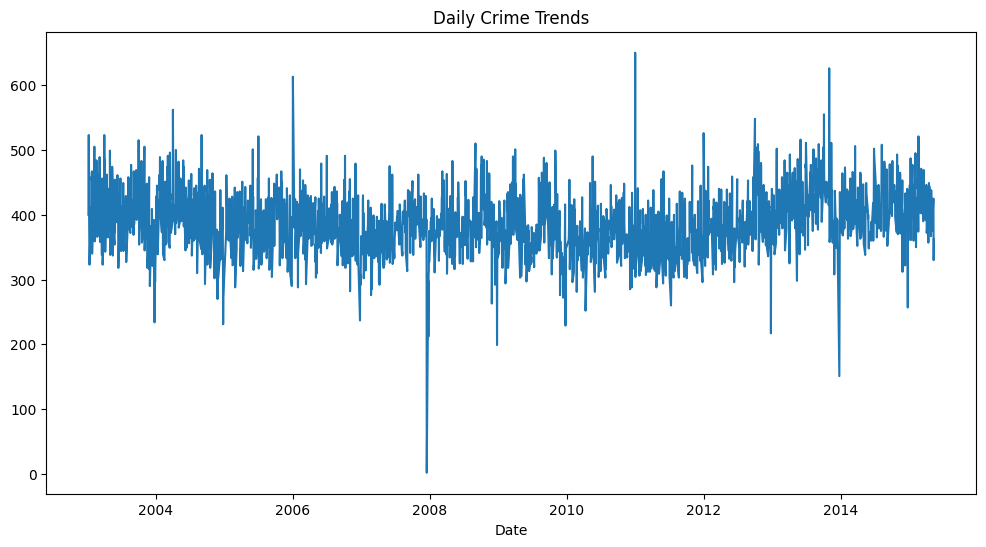

In [35]:
df['Date'] = pd.to_datetime(df['Dates']).dt.date
daily_crimes = df.groupby('Date').size()
daily_crimes.plot(figsize=(12, 6), title='Daily Crime Trends')

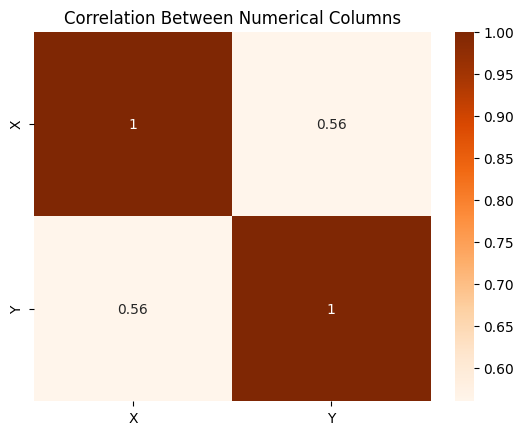

In [37]:
# Select numerical columns
numerical_data = df[['X', 'Y']]  # Add other numerical columns if present
sns.heatmap(numerical_data.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Between Numerical Columns')
plt.show()

**Fuzzy Algorithm**

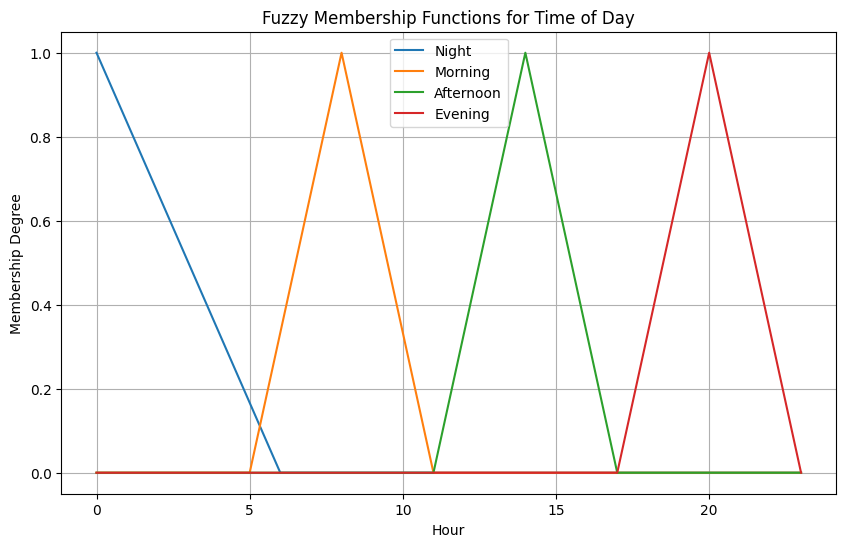

In [39]:
# Define the universe of discourse for time (0-23 hours)
x_time = np.arange(0, 24, 1)

# Define fuzzy membership functions
night = fuzz.trimf(x_time, [0, 0, 6])
morning = fuzz.trimf(x_time, [5, 8, 11])
afternoon = fuzz.trimf(x_time, [11, 14, 17])
evening = fuzz.trimf(x_time, [17, 20, 23])

# Plot the fuzzy sets
plt.figure(figsize=(10,6))
plt.plot(x_time, night, label='Night')
plt.plot(x_time, morning, label='Morning')
plt.plot(x_time, afternoon, label='Afternoon')
plt.plot(x_time, evening, label='Evening')
plt.title('Fuzzy Membership Functions for Time of Day')
plt.xlabel('Hour')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Define a function to classify hour into fuzzy period
def classify_time_of_day(hour):
    night_level = fuzz.interp_membership(x_time, night, hour)
    morning_level = fuzz.interp_membership(x_time, morning, hour)
    afternoon_level = fuzz.interp_membership(x_time, afternoon, hour)
    evening_level = fuzz.interp_membership(x_time, evening, hour)
    
    levels = {
        'Night': night_level,
        'Morning': morning_level,
        'Afternoon': afternoon_level,
        'Evening': evening_level
    }
    
    # Return the period with highest membership
    return max(levels, key=levels.get)

# Apply to whole dataframe
df['FuzzyPeriod'] = df['Hour'].apply(classify_time_of_day)

# Check the results
df[['Dates', 'Hour', 'FuzzyPeriod']].head()

,Dates,Hour,FuzzyPeriod
0,2015-05-13 23:53:00,23,Night
1,2015-05-13 23:53:00,23,Night
2,2015-05-13 23:33:00,23,Night
3,2015-05-13 23:30:00,23,Night
4,2015-05-13 23:30:00,23,Night


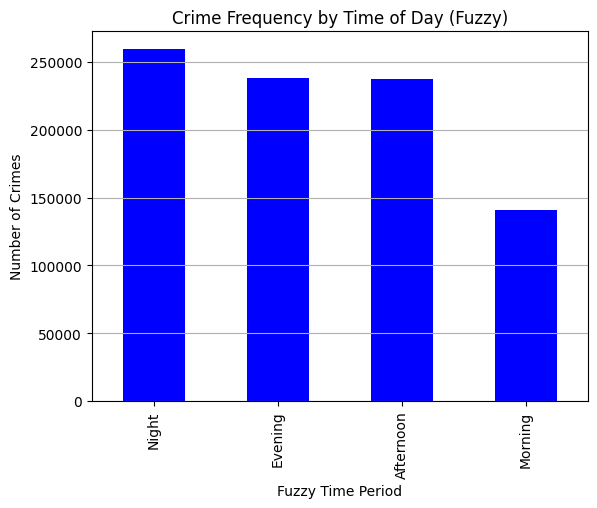

In [41]:
# Simple plot
df['FuzzyPeriod'].value_counts().plot(kind='bar', color='blue')
plt.title('Crime Frequency by Time of Day (Fuzzy)')
plt.xlabel('Fuzzy Time Period')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

In [42]:
# Create synthetic data
X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

# Define the fitness function
def evaluate(individual):
    # Assign each point to a cluster based on the individual's chromosome
    clusters = [individual[i] for i in range(len(X))]
    
    # Calculate the within-cluster sum of squared distances (WSS)
    _, distances = pairwise_distances_argmin_min(X, X)
    wss = np.sum(distances**2)
    
    # Return the fitness score
    return (wss,)

# Define genetic algorithm parameters
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize WSS
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 3)  # Cluster labels (0, 1, or 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=len(X))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Create the population
population = toolbox.population(n=50)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, verbose=True)

# Get the best solution
best_individual = tools.selBest(population, 1)[0]
print(f"Best clustering: {best_individual}")

gen	nevals
0  	50    
1  	31    
2  	36    
3  	32    
4  	36    
5  	32    
6  	38    
7  	32    
8  	40    
9  	37    
10 	36    
11 	37    
12 	32    
13 	32    
14 	35    
15 	29    
16 	36    
17 	40    
18 	39    
19 	38    
20 	42    
21 	32    
22 	39    
23 	41    
24 	41    
25 	42    
26 	38    
27 	39    
28 	39    
29 	42    
30 	33    
31 	42    
32 	42    
33 	38    
34 	41    
35 	40    
36 	36    
37 	43    
38 	35    
39 	34    
40 	34    
41 	40    
42 	38    
43 	37    
44 	40    
45 	38    
46 	40    
47 	38    
48 	40    
49 	42    
50 	37    
Best clustering: [1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1,

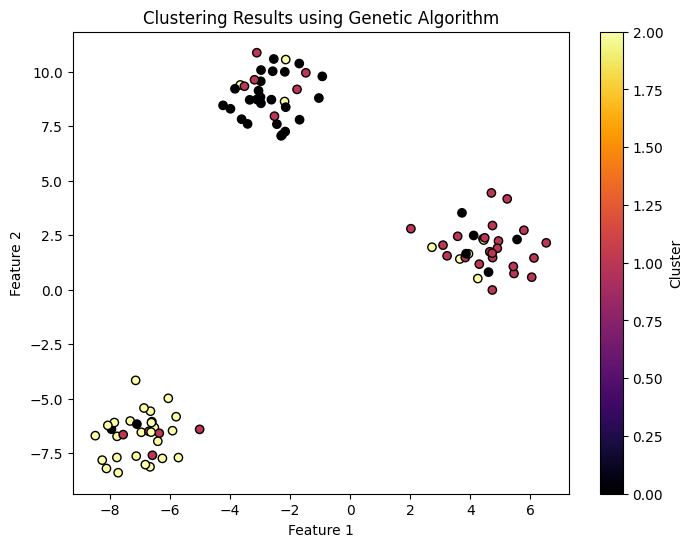

In [43]:
# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Create the DEAP classes for Genetic Algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define a function to create an individual (a potential solution)
def create_individual():
    return [np.random.randint(0, 3) for _ in range(len(X))]

# Define the evaluation function (fitness function)
def evaluate(individual):
    # Assign clusters to individuals
    clusters = np.array(individual)
    # Compute the distance between points and their assigned centroids
    dist = pairwise_distances_argmin_min(X, np.array([X[clusters == i].mean(axis=0) for i in range(3)])[clusters])[1]
    return (dist.sum(),)  # Return the sum of distances as the fitness

# Set up the toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Generate the population
population = toolbox.population(n=50)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, verbose=False)

# Extract the best individual
best_individual = tools.selBest(population, 1)[0]

# Assign the final clusters
final_clusters = np.array(best_individual)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_clusters, cmap='inferno', marker='o', edgecolor='k')
plt.title("Clustering Results using Genetic Algorithm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

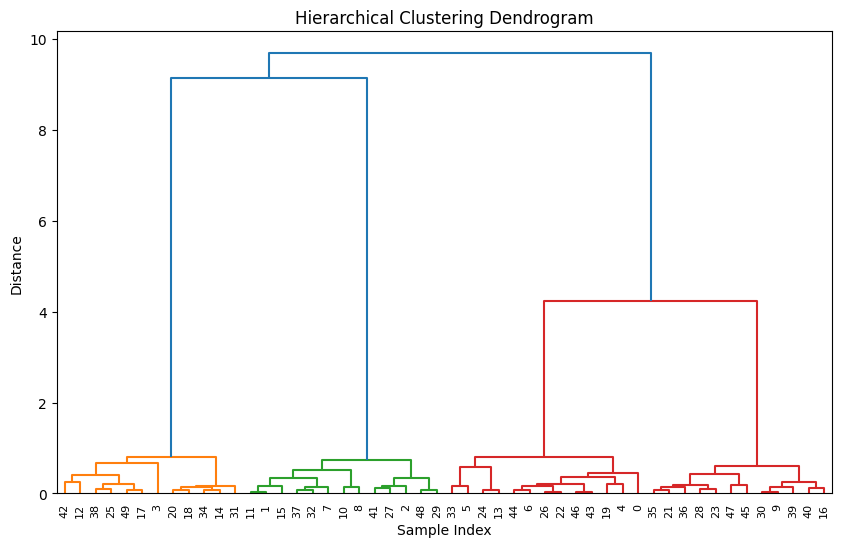

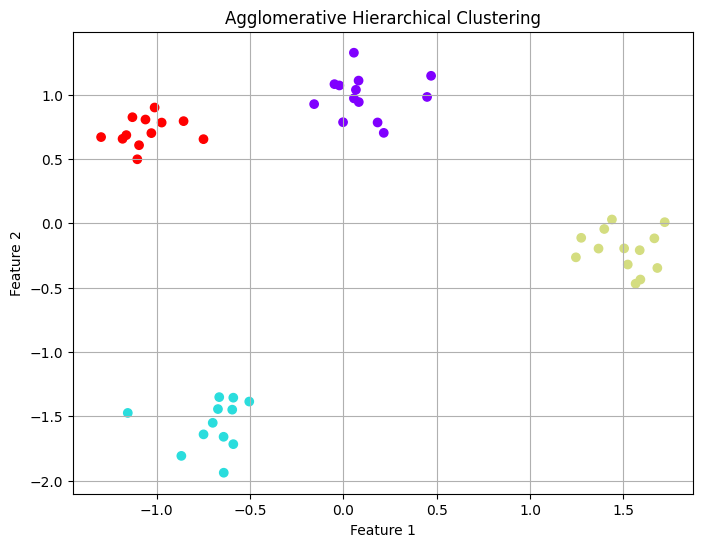

In [44]:
# Replace this with your real data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the dendrogram to decide number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
labels = agglo.fit_predict(X_scaled)

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [45]:
df.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Date,FuzzyPeriod
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,0.043578,0.001276,23,2015-05-13,Night
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,0.043578,0.001276,23,2015-05-13,Night
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,0.044337,0.001770,23,2015-05-13,Night


**Decision Tree Algorithm**

Model: Decision Tree
Accuracy: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00     23200
           2       1.00      1.00      1.00       117
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00     10958
           5       1.00      1.00      1.00      1295
           6       1.00      1.00      1.00       680
           7       1.00      1.00      1.00     16230
           8       1.00      1.00      1.00      1297
           9       1.00      1.00      1.00       337
          10       1.00      1.00      1.00        71
          11       1.00      1.00      1.00       154
          12       1.00      1.00      1.00      3151
          13       1.00      1.00      1.00      5100
          14       1.00      0.96      0.98        47
          15       0.94      0.90      0.92       673
          16       1

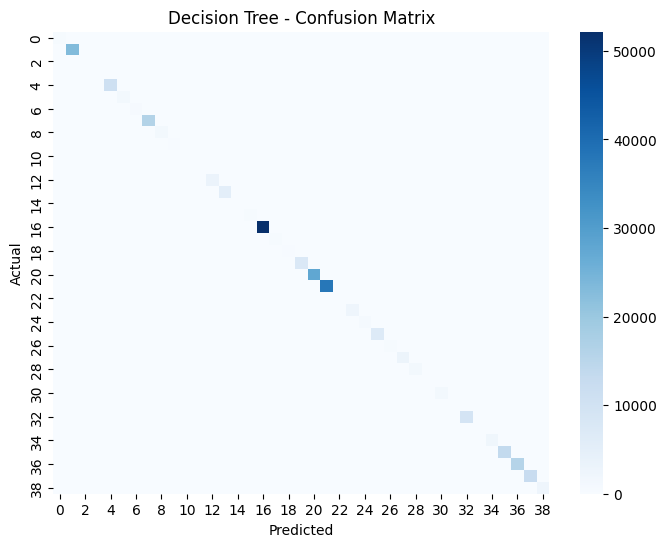

In [46]:
# Handle missing values by filling or dropping
df = df.fillna('Unknown')

# Identify columns that are categorical
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert all categorical columns to strings to avoid issues with encoding
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Encode categorical features using LabelEncoder
label_encoders = {}  # To store encoders for each column if needed later
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Category', 'Dates'])  # Features (excluding target and date columns)
y = df['Category']  # Target (the category)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  # Fit on training data
y_pred_dt = dt_model.predict(X_val)  # Predict on validation data

# Evaluation
print("Model: Decision Tree")
print(f"Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=False, cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Random Forest Algorithm**

Model: Random Forest
Accuracy: 0.9545
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       462
           1       0.94      0.96      0.95     23200
           2       0.80      0.17      0.28       117
           3       0.88      0.29      0.44        96
           4       1.00      0.99      1.00     10958
           5       0.89      0.72      0.79      1295
           6       0.93      0.84      0.88       680
           7       0.98      0.97      0.97     16230
           8       0.88      0.84      0.86      1297
           9       0.82      0.53      0.65       337
          10       0.33      0.07      0.12        71
          11       0.79      0.20      0.32       154
          12       0.84      0.85      0.84      3151
          13       0.89      0.85      0.87      5100
          14       0.62      0.11      0.18        47
          15       0.52      0.26      0.34       673
          16       0

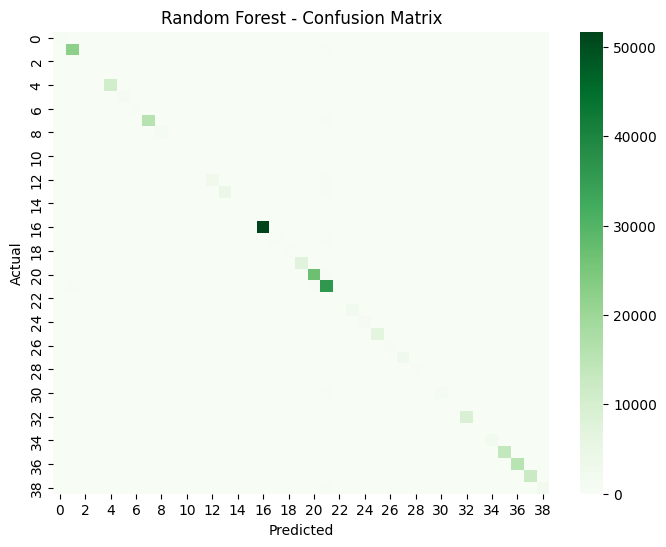

In [47]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# Evaluation
print("Model: Random Forest")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=False, cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**K-Nearest Neighbors Algorithm**

Model: K-Nearest Neighbors (KNN)
Accuracy: 0.6155
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.01      0.02       462
           1       0.55      0.57      0.56     23200
           2       0.02      0.01      0.01       117
           3       0.03      0.01      0.02        96
           4       0.69      0.78      0.73     10958
           5       0.23      0.24      0.23      1295
           6       0.06      0.03      0.04       680
           7       0.69      0.81      0.75     16230
           8       0.24      0.15      0.19      1297
           9       0.06      0.04      0.05       337
          10       0.12      0.04      0.06        71
          11       0.09      0.05      0.06       154
          12       0.34      0.25      0.28      3151
          13       0.36      0.27      0.31      5100
          14       0.00      0.00      0.00        47
          15       0.10      0.03      0.04       673
        

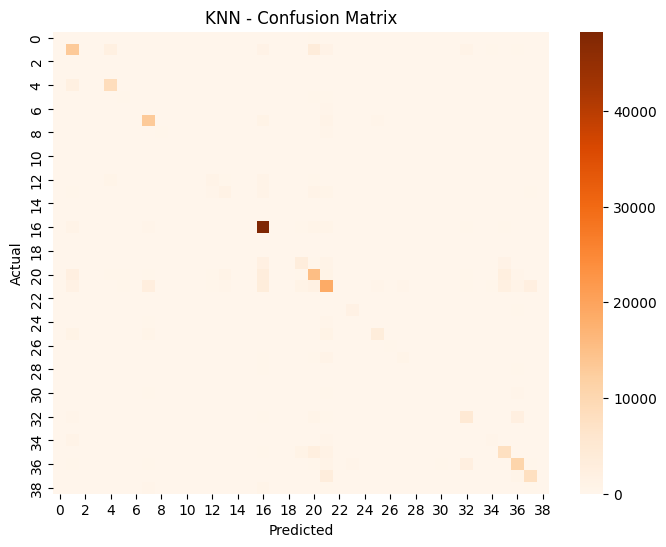

In [48]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)

# Evaluation
print("Model: K-Nearest Neighbors (KNN)")
print(f"Accuracy: {accuracy_score(y_val, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_knn, zero_division=0))
print("Confusion Matrix:")
cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=False, cmap="Oranges")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Naive Bayes ALgorithm**

Model: Naive Bayes
Accuracy: 0.4804
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.03      0.06       462
           1       0.62      0.20      0.30     23200
           2       1.00      0.72      0.84       117
           3       0.00      0.00      0.00        96
           4       0.53      0.84      0.65     10958
           5       0.00      0.00      0.00      1295
           6       0.99      0.88      0.93       680
           7       0.50      0.79      0.61     16230
           8       1.00      1.00      1.00      1297
           9       0.85      0.23      0.37       337
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00       154
          12       0.00      0.00      0.00      3151
          13       0.00      0.00      0.00      5100
          14       0.00      0.00      0.00        47
          15       0.00      0.00      0.00       673
          16       0.5

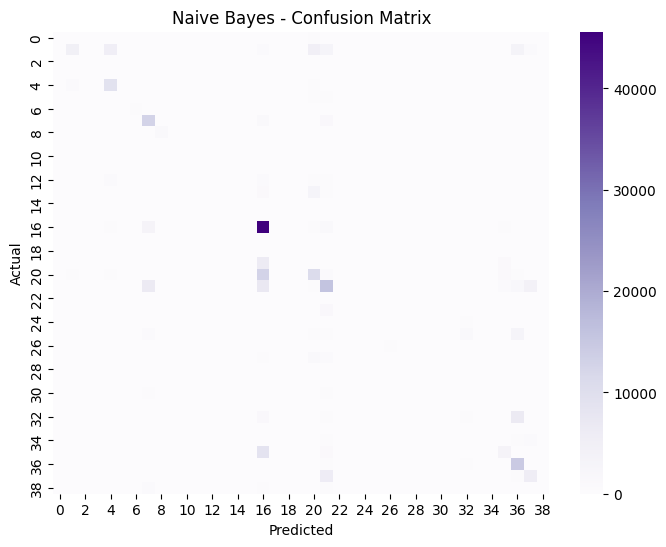

In [49]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

# Evaluation
print("Model: Naive Bayes")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nb):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_nb, zero_division=0))
print("Confusion Matrix:")
cm_nb = confusion_matrix(y_val, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=False, cmap="Purples")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Comparision**

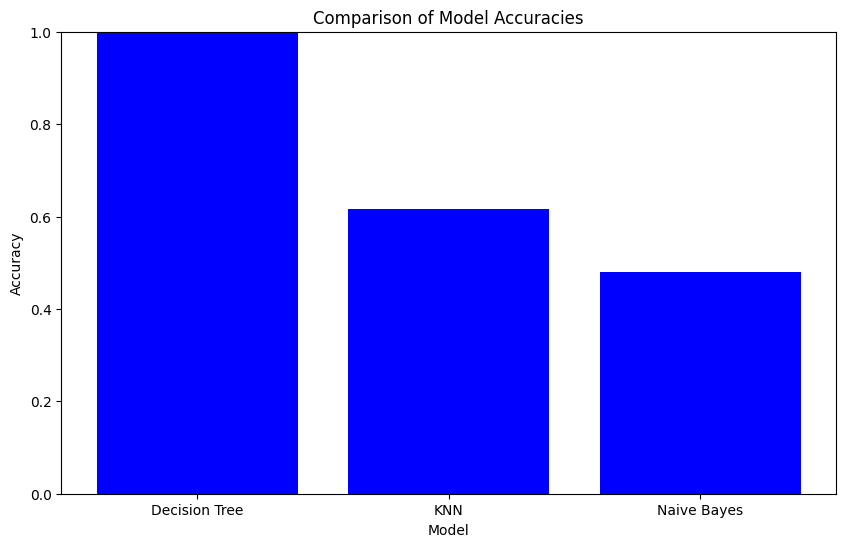

In [51]:
# Compare model accuracies (optional summary chart)
accuracies = {
    "Decision Tree": accuracy_score(y_val, y_pred_dt),
    # "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_val, y_pred_knn),
    "Naive Bayes": accuracy_score(y_val, y_pred_nb)
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='blue')
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [52]:
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Precision:", precision_score(y_val, y_pred_dt, average='weighted', zero_division=0))
print("Recall:", recall_score(y_val, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_val, y_pred_dt, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt, zero_division=0))

Accuracy: 0.9993453056128625
Precision: 0.9993398266943623
Recall: 0.9993453056128625
F1-score: 0.9993412207915101
Confusion Matrix:
 [[  462     0     0 ...     0     0     0]
 [    0 23155     0 ...     0     0     0]
 [    0     0   117 ...     0     0     0]
 ...
 [    0     0     0 ... 15877     0     0]
 [    0     0     0 ...     0 12600     0]
 [    0     0     0 ...     0     0  2461]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00     23200
           2       1.00      1.00      1.00       117
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00     10958
           5       1.00      1.00      1.00      1295
           6       1.00      1.00      1.00       680
           7       1.00      1.00      1.00     16230
           8       1.00      1.00      1.00      1297
           9       1.00      1.00    

In [53]:
plt.figure(figsize=(12, 6))
crime_counts = df['Category'].value_counts().head(10)  

<Figure size 1200x600 with 0 Axes>

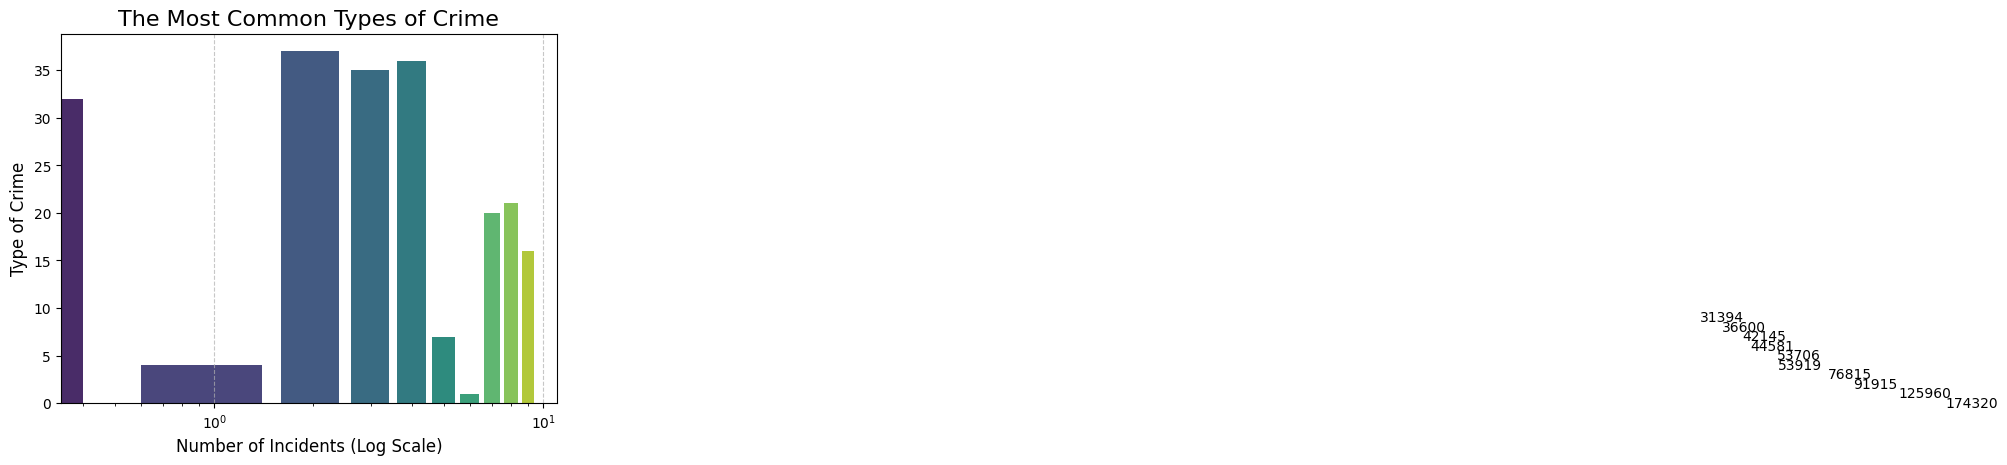

In [60]:
# Create the barplot
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette='viridis')

# Plot styling
plt.title('The Most Common Types of Crime', fontsize=16)
plt.xlabel('Number of Incidents (Log Scale)', fontsize=12)
plt.ylabel('Type of Crime', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Apply log scale to x-axis
plt.xscale('log')

# Add value labels to each bar
for i, v in enumerate(crime_counts.values):
    plt.text(v * 1.05, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()
plt.show()


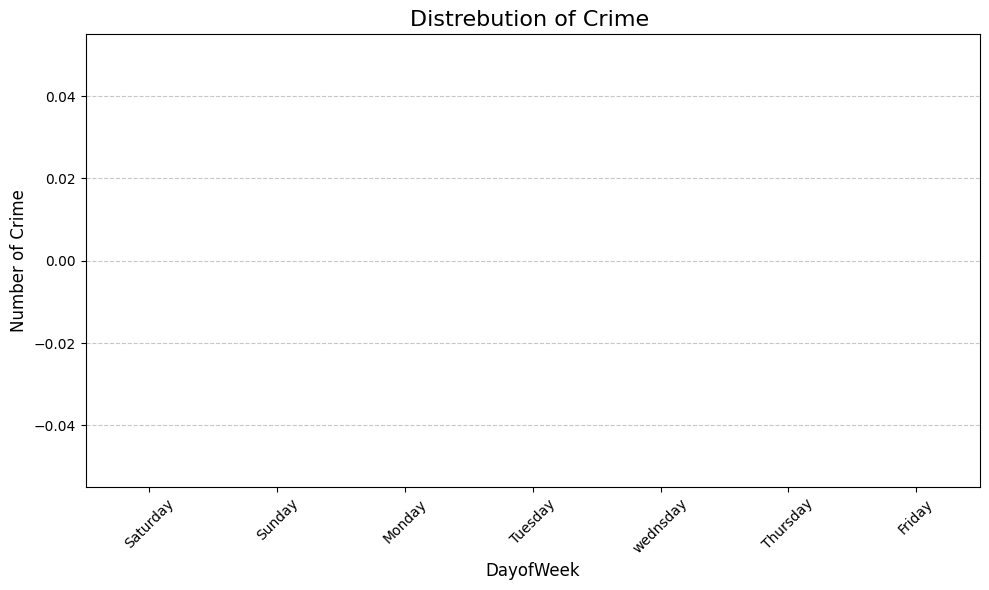

In [61]:
day_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'wednsday', 'Thursday', 'Friday']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=day_order, palette='coolwarm')

plt.title('Distrebution of Crime ', fontsize=16)
plt.xlabel('DayofWeek', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()

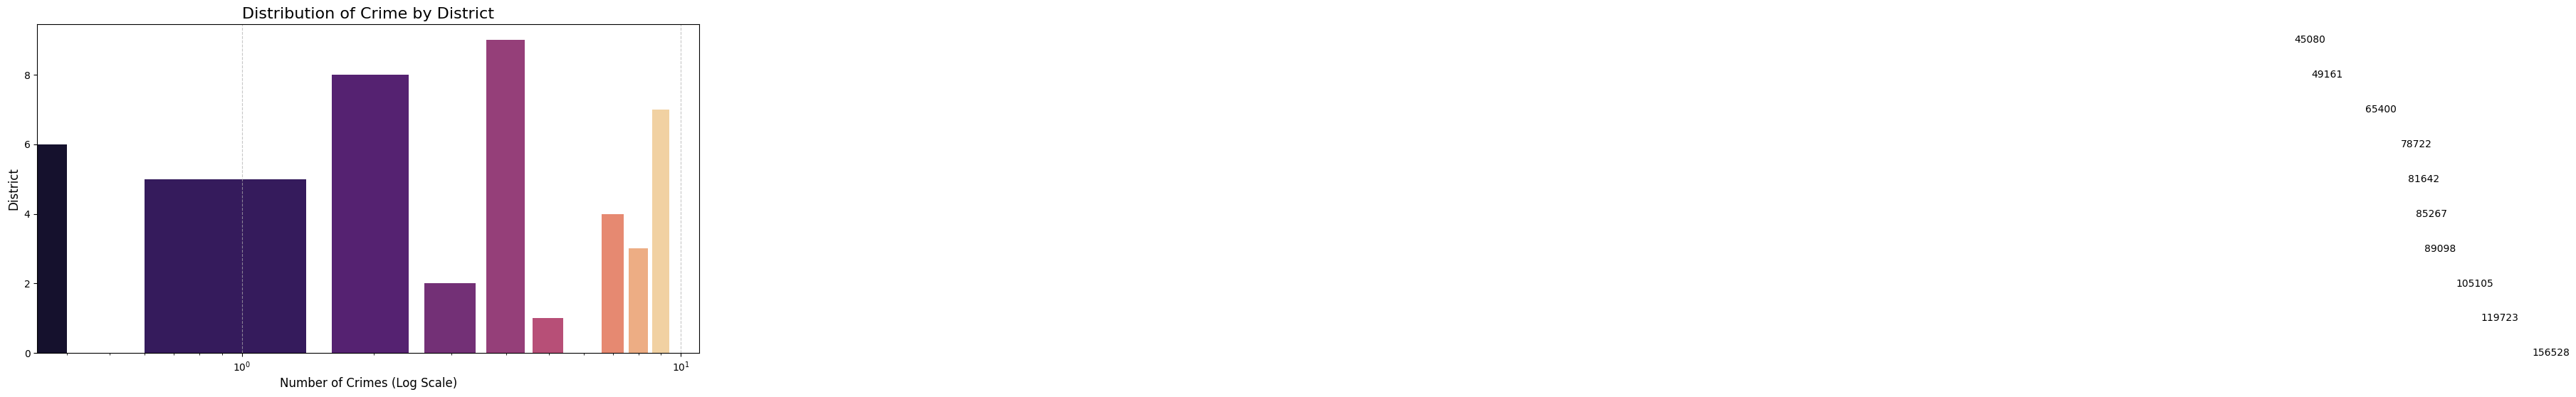

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crimes per district
district_counts = df['PdDistrict'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(x=district_counts.values, y=district_counts.index, palette='magma')

# Title and labels
plt.title('Distribution of Crime by District', fontsize=16)
plt.xlabel('Number of Crimes (Log Scale)', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Apply log scale to x-axis
plt.xscale('log')

# Add value labels with spacing suitable for log scale
for i, v in enumerate(district_counts.values):
    plt.text(v * 1.05, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()
plt.show()


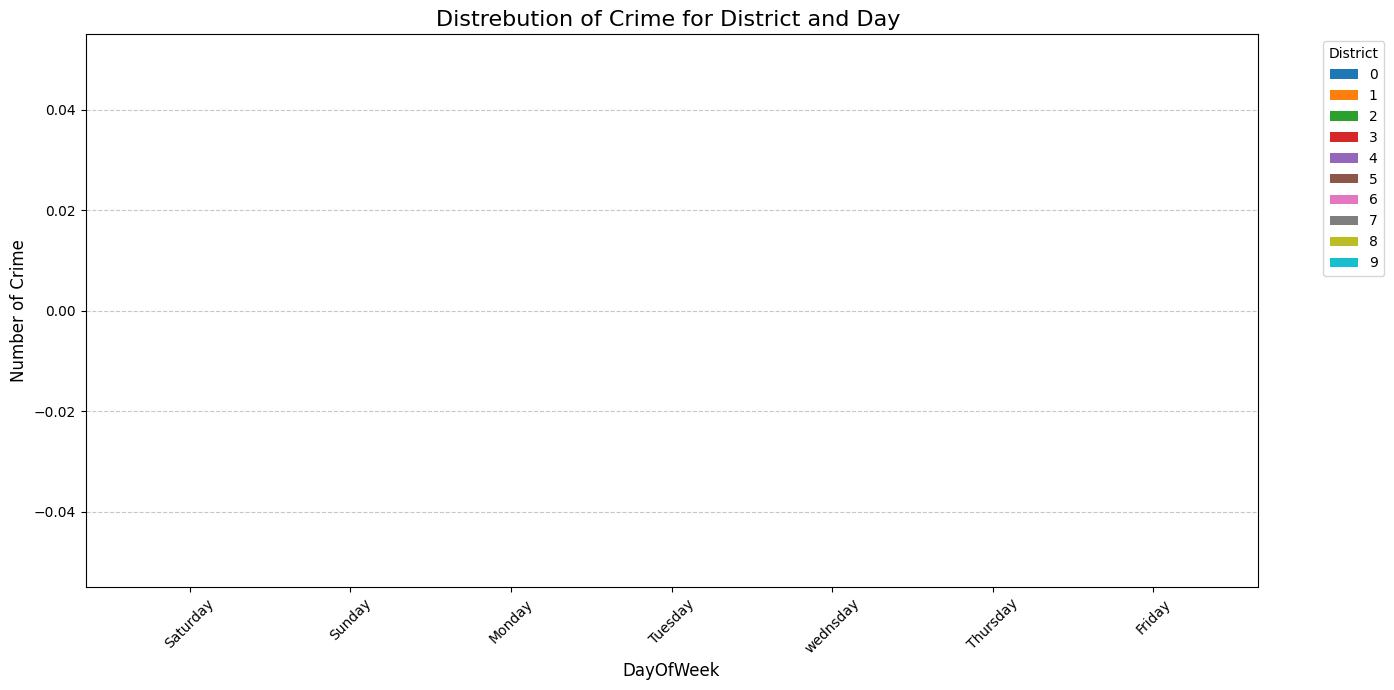

In [65]:
cross_tab = pd.crosstab(df['DayOfWeek'], df['PdDistrict']).reindex(day_order)
cross_tab.plot(kind='bar', figsize=(14, 7), width=0.8)

plt.title('Distrebution of Crime for District and Day ', fontsize=16)
plt.xlabel('DayOfWeek', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

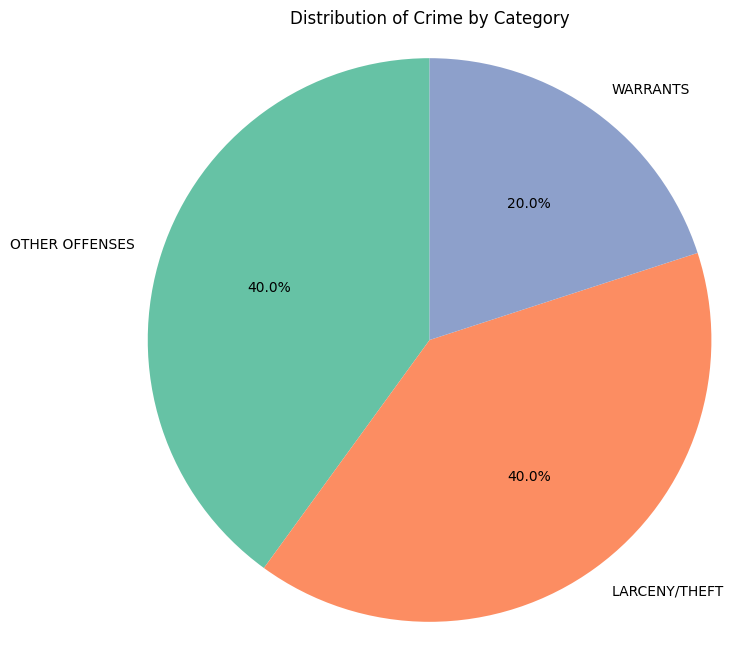

In [ ]:
# data
data = {
    'Dates': ['2015-05-13 23:53:00', '2015-05-13 23:53:00', '2015-05-13 23:33:00', '2015-05-13 23:30:00', '2015-05-13 23:30:00'],
    'Category': ['WARRANTS', 'OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', 'LARCENY/THEFT'],
    'Descript': ['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST', 'TRAFFIC VIOLATION ARREST', 
                 'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM LOCKED AUTO'],
    'DayOfWeek': ['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
    'PdDistrict': ['NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'PARK'],
    'Resolution': ['ARREST, BOOKED', 'ARREST, BOOKED', 'ARREST, BOOKED', 'NONE', 'NONE'],
    'Address': ['OAK ST / LAGUNA ST', 'OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST', 
                '1500 Block of LOMBARD ST', '100 Block of BRODERICK ST'],
    'X': [-122.425892, -122.425892, -122.424363, -122.426995, -122.438738],
    'Y': [37.774599, 37.774599, 37.800414, 37.800873, 37.771541]
}

df = pd.DataFrame(data)

# Count categories
category_counts = df['Category'].value_counts()

# Choose a colormap with enough colors
colors = cm.Set2.colors[:len(category_counts)]  # You can try Set3, tab20, Pastel1, etc.

# Plot
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Crime by Category')
plt.axis('equal')  # Equal aspect ratio for a perfect circle

plt.show()
